In [2]:
import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns

#Team Contract
#Decide one a Stakeholder
#EDA
#Plot, look into outliers,nulls
#Decide which predictors to use for the single model and the other model 

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
#Removing nulls from yr renovated assuming its 0

In [5]:
df['yr_renovated'] = df['yr_renovated'].astype(int)
#Making years intergers for calculations of age

In [6]:
df['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int64

In [7]:
df['date_yr'] = pd.DatetimeIndex(df['date']).year
#turning sale dates into years for age calculation to associate age with model

In [8]:
df['date_yr']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: date_yr, Length: 21597, dtype: int64

In [9]:
df['age'] = 0

In [10]:
def age(renovated, built, year, age): 
    if renovated < 1:
        age = year - built
    else: age = year - renovated
    
    return age
        

In [11]:
def age2(row):
    if row['yr_renovated'] < 1:
        return  row['date_yr'] - row['yr_built']
    else:
        return row['date_yr']- row['yr_renovated']
        

In [12]:
df.apply(age2, axis=1)

0        59
1        23
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Length: 21597, dtype: int64

In [13]:
df2 = df.copy

In [14]:
df['age2'] = df.apply(age2, axis=1)

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age,age2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,0,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,0,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,0,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,28


In [16]:
df['yr_renovated'].value_counts()

0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [17]:
df['yr_built'].isna().sum()

0

In [18]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [19]:
df['age'] = df['age2']

In [20]:
df = df.drop('age2', axis=1)

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


Dealing with outliers

In [22]:
# exploratory
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


<AxesSubplot:>

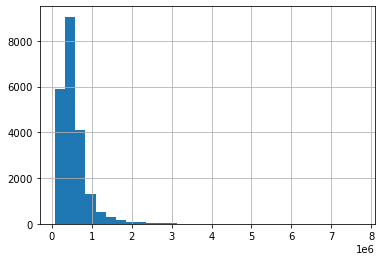

In [23]:
df['price'].hist(bins=30)

In [24]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

<AxesSubplot:>

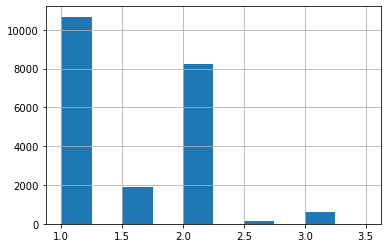

In [25]:
df['floors'].hist()

In [26]:
def outlier_finder(column):

    n = float(len(column))
    mean = column.mean()
    std = column.std()

    return (mean - (2* std), mean + (2* std))

In [27]:
outlier_finder(df['floors'])

(0.4147308203230029, 2.5734619842331856)

In [28]:
outlier_finder(df['bedrooms'])

(1.5206021923946136, 5.225797770563205)

In [29]:
outlier_finder(df['sqft_living'])

(244.10960009681935, 3916.5341004171414)

In [30]:
outlier_finder(df['price'])

(-194439.7066972095, 1275032.8537083685)

In [31]:
outlier_finder(df['age'])

(-16.52391525338747, 99.27957576179142)

In [32]:
df = df.loc[df['bedrooms'] < 5.22]

In [33]:
df = df.loc[df['floors'] < 2.57]

In [34]:
df = df.loc[df['age'] < 99.27]

In [35]:
df = df.loc[(df['sqft_living'] < 3916.53) &(df['sqft_living']>244.11)]

<AxesSubplot:>

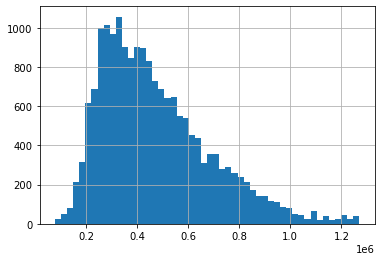

In [36]:
df = df.loc[df['price'] <= 1275032.85]
df['price'].hist(bins = 50)

<AxesSubplot:>

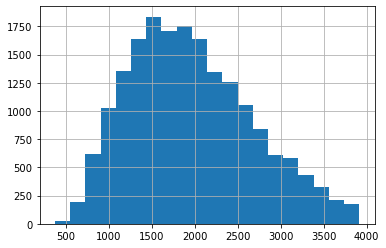

In [37]:
#checking for sqft_living outliers
df['sqft_living'].hist(bins=20)

In [38]:
#Creating functions for Assumptions!
#LINEARITY FUNCTION
# THE RELATIONSHIP BETWEEN THE TARGET AND PREDICTOR SHOULD BE LINEAR
def linearity_test(endog, exog):
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    fig, ax = plt.subplots()
    ax.scatter(predictions, residuals)
    ax.set_xlabel('predicted Y')
    ax.set_ylabel('residual values')
    plt.suptitle('Residuals Vs. Predictions');

In [39]:
# INDEPENDENCE FUNCTION
def independence_test_DW(endog,exog):
    ''' POarameters Taken: endog, exog
        Returns: the durbin Watson Test Statistic
        Details: The Durbin-Watson test statistic is calculated on the null hypothesis that there is no correlation among the errors. 
        The test statistic has a range of 0 to 4, where 2 indicates no correlation, a score less than 2 indicates a positive correlation, and a score greater than 2 indicates a negative correlation.
    '''
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    dw = sm.stats.stattools.durbin_watson
    return dw(residuals)

In [40]:
def normality_test(endog,exog):
    ''' Checking that the errors are normally distibuted.
    The test statistic of the Jarque-Bera test is always a positive number and if it’s far from zero, it indicates that the sample data do not have a normal distribution.
    Omnibus P value : A minimum value of 1000 is recommended. Multiple-testing correction provides Bonferroni correction and false discovery rate (FDR). A significance level must be specified in the significance level (a).
    '''
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    model = sm.OLS(endog=endog, exog=exog).fit()
    residuals = endog - predictions
    residuals.hist(bins=20);

In [41]:
def homoskedasticity_test(endog,exog):
    ''' Often when errors are heteroskedastic they will be greater for greater values of the target. If the target has an exponential distribution, with lots of small values and few large values, then the model will tend to focus on the smaller values in calculating its betas, producing volatility for the higher end of the spectrum. And so we'll see greater divergence in the errors for larger values of the target.
    
    '''
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    fig, ax = plt.subplots()
    ax.scatter(endog, residuals)
    ax.set_xlabel('Y values')
    ax.set_ylabel('Residual Values')
    plt.suptitle('Residuals Vs. Predictions');

In [42]:
df['floors'].isna().sum()

0

In [43]:
df = df.dropna(subset=['view'])

In [44]:
ids = df['id']

dups = df[ids.isin(ids[ids.duplicated()])].sort_values('id')
dups

#We have decided to keep duplicate Ids because they have different prices and its more data for our model

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,NO,NONE,...,0.0,1925,0,98055,47.4840,-122.211,1480,6969,2015,90
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,NO,NONE,...,0.0,1925,0,98055,47.4840,-122.211,1480,6969,2014,89
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,NO,NONE,...,0.0,1980,0,98023,47.2977,-122.367,1830,6956,2014,34
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,NO,NONE,...,0.0,1980,0,98023,47.2977,-122.367,1830,6956,2014,34
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,NO,NONE,...,0.0,1939,0,98106,47.5138,-122.364,1180,8244,2014,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,2/26/2015,322000.0,3,1.75,1510,8400,1.0,NO,NONE,...,530.0,1979,0,98045,47.4476,-121.771,1500,10125,2015,36
6340,9828200460,1/6/2015,430000.0,2,1.00,700,4800,1.0,NO,NONE,...,0.0,1922,0,98122,47.6147,-122.300,1440,4800,2015,93
6339,9828200460,6/27/2014,260000.0,2,1.00,700,4800,1.0,NO,NONE,...,0.0,1922,0,98122,47.6147,-122.300,1440,4800,2014,92
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,NO,NONE,...,1040.0,1962,0,98144,47.5720,-122.290,1340,4080,2015,53


In [45]:
df.duplicated().sum()
#There are no actual duplicates

0

In [46]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,130.0,2008,0,98116,47.5773,-122.409,1330,1265,2015,7
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,2015,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,2014,5
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11


Simple models


Model1:OLS(sqft_living)

In [47]:
simple_X = df['sqft_living']
simple_Y = df['price']
simple_X_cons = sm.add_constant(simple_X)
simple_model = sm.OLS(endog = simple_Y, exog = simple_X_cons).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.160e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:42:18   Log-Likelihood:            -2.4980e+05
No. Observations:               18569   AIC:                         4.996e+05
Df Residuals:                   18567   BIC:                         4.996e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.077e+05   3607.028     29.868      0.000    1.01e+05    1.15e+05
sqft_living   186.4143      1.731    107.722      0.000     183.022     189.806
==============================================================================
Omnibus:                     1746.290   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2466.015
Skew:                           0.753   Prob(JB):                         0.00
Kurtosis:                       3.959   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

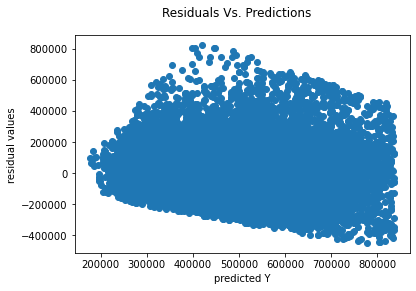

In [48]:
#Checking model for assumptions
linearity_test(simple_Y, simple_X_cons)

In [49]:
independence_test_DW(simple_Y, simple_X_cons)

1.9680207861792205

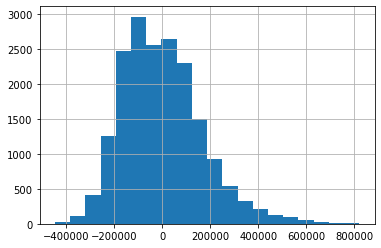

In [50]:
normality_test(simple_Y, simple_X_cons)

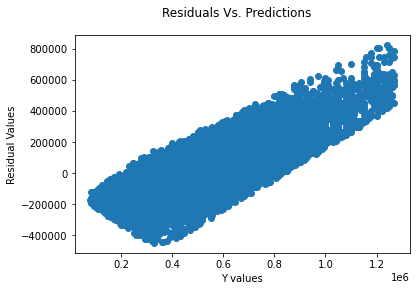

In [51]:
homoskedasticity_test(simple_Y, simple_X_cons)

Model2:OLS(bedrooms)

In [52]:
simple_X2 = df['bedrooms']
simple_Y2 = df['price']
simple_X2_cons = sm.add_constant(simple_X2)
simple_model2 = sm.OLS(endog = simple_Y2, exog = simple_X2_cons).fit()
simple_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1673.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:42:19   Log-Likelihood:            -2.5351e+05
No. Observations:               18569   AIC:                         5.070e+05
Df Residuals:                   18567   BIC:                         5.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.199e+05   6365.310     34.539      0.000    2.07e+05    2.32e+05
bedrooms    7.657e+04   1872.092     40.903      0.000    7.29e+04    8.02e+04
==============================================================================
Omnibus:                     2171.838   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3059.907
Skew:                           0.915   Prob(JB):                         0.00
Kurtosis:                       3.776   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

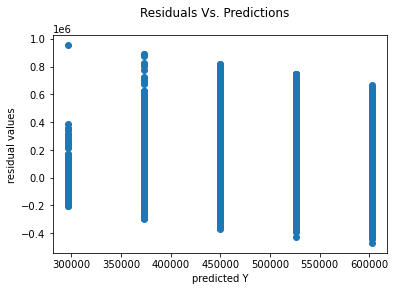

In [53]:
#Checking model for assumptions
linearity_test(simple_Y2, simple_X2_cons)

In [54]:
independence_test_DW(simple_Y2, simple_X2_cons)

1.9643621919734793

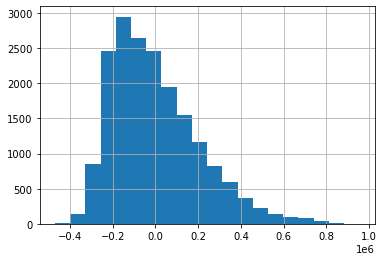

In [55]:
normality_test(simple_Y2, simple_X2_cons)

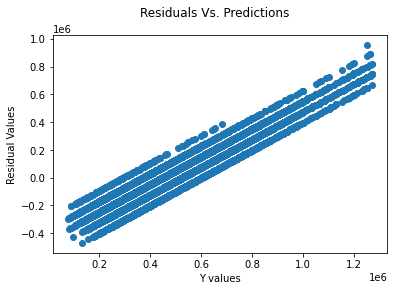

In [56]:
homoskedasticity_test(simple_Y2, simple_X2_cons)

Mode3:OLS(Age)

In [57]:
simple_X3 = df['age']
simple_Y3 = df['price']
simple_X3_cons = sm.add_constant(simple_X3)
simple_model3 = sm.OLS(endog = simple_Y3, exog = simple_X3_cons).fit()
simple_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     251.0
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           3.72e-56
Time:                        09:42:20   Log-Likelihood:            -2.5418e+05
No. Observations:               18569   AIC:                         5.084e+05
Df Residuals:                   18567   BIC:                         5.084e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.115e+05   2899.378    176.409      0.000    5.06e+05    5.17e+05
age         -964.3403     60.872    -15.842      0.000   -1083.655    -845.025
==============================================================================
Omnibus:                     2372.096   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3413.491
Skew:                           0.979   Prob(JB):                         0.00
Kurtosis:                       3.760   Cond. No.                         88.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

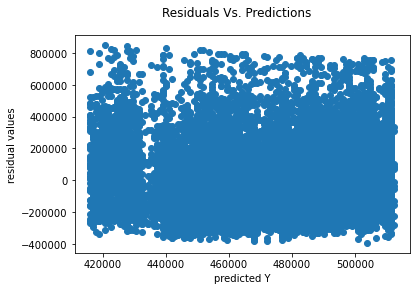

In [58]:
#Checking model for assumptions
linearity_test(simple_Y3, simple_X3_cons)

In [59]:
independence_test_DW(simple_Y3, simple_X3_cons)

1.9777583090422182

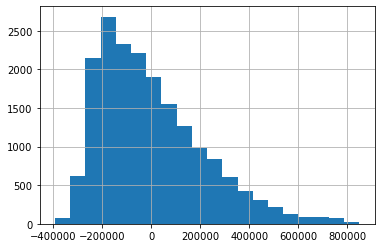

In [60]:
normality_test(simple_Y3, simple_X3_cons)

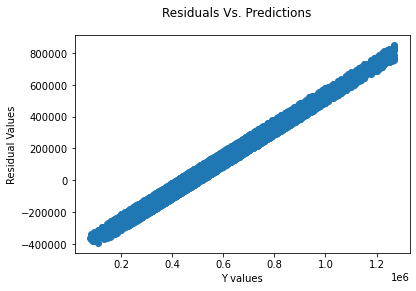

In [61]:
homoskedasticity_test(simple_Y3, simple_X3_cons)

Model4:OLS(floors)

In [62]:
simple_X4 = df['floors']
simple_Y4 = df['price']
simple_X4_cons = sm.add_constant(simple_X4)
simple_model4 = sm.OLS(endog = simple_Y4, exog = simple_X4_cons).fit()
simple_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1549.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:42:21   Log-Likelihood:            -2.5356e+05
No. Observations:               18569   AIC:                         5.071e+05
Df Residuals:                   18567   BIC:                         5.071e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.954e+05   4755.092     62.114      0.000    2.86e+05    3.05e+05
floors      1.244e+05   3161.739     39.361      0.000    1.18e+05    1.31e+05
==============================================================================
Omnibus:                     2310.063   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3323.849
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       3.826   Cond. No.                         6.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

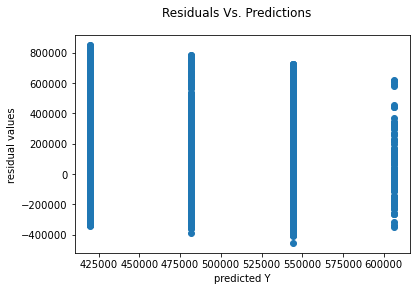

In [63]:
#Checking model for assumptions
linearity_test(simple_Y4, simple_X4_cons)

In [64]:
independence_test_DW(simple_Y4, simple_X4_cons)

1.9778830973103754

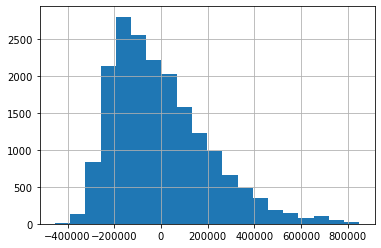

In [65]:
normality_test(simple_Y4, simple_X4_cons)

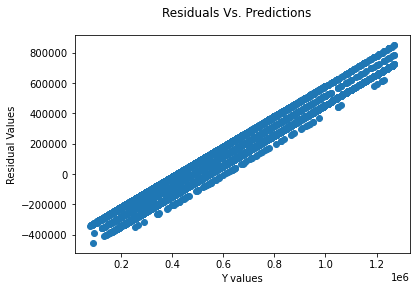

In [66]:
homoskedasticity_test(simple_Y4, simple_X4_cons)

In [67]:
df_nums = df[['price', 'bedrooms', 'age', 'sqft_living', 'floors']]

In [68]:
df_nums.isna().sum()


price          0
bedrooms       0
age            0
sqft_living    0
floors         0
dtype: int64

In [69]:
df_nums.shape

(18569, 5)

In [70]:
df_scale = df_nums.drop('price',axis=1)

In [71]:
df_scale

,bedrooms,age,sqft_living,floors
0,3,59,1180,1.0
1,3,23,2570,2.0
2,2,82,770,1.0
3,4,49,1960,1.0
4,3,28,1680,1.0
...,...,...,...,...
21591,3,7,1310,2.0
21593,4,1,2310,2.0
21594,2,5,1020,2.0
21595,3,11,1600,2.0


In [72]:
df_price = df_nums['price']
df_price.shape

(18569,)

In [73]:
#scaling to adjust for standard scaler!
df_price = df_price.reset_index(drop=True)
df_price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
18564    475000.0
18565    400000.0
18566    402101.0
18567    400000.0
18568    325000.0
Name: price, Length: 18569, dtype: float64

In [74]:
ss = StandardScaler()

ss.fit(df_scale)

df_scale.head()

,bedrooms,age,sqft_living,floors
0,3,59,1180,1.0
1,3,23,2570,2.0
2,2,82,770,1.0
3,4,49,1960,1.0
4,3,28,1680,1.0


In [75]:
df_scaled_new = ss.transform(df_scale)
df_scaled_new

array([[-0.37651157,  0.73534921, -1.09047203, -0.89000868],
       [-0.37651157, -0.66578346,  0.85693251,  1.20011035],
       [-1.61789002,  1.63051731, -1.66488632, -0.89000868],
       ...,
       [-1.61789002, -1.36634979, -1.3146337 ,  1.20011035],
       [-0.37651157, -1.13282768, -0.50204764,  1.20011035],
       [-1.61789002, -1.32742944, -1.3146337 ,  1.20011035]])

In [76]:
df_scaled_new = pd.DataFrame(df_scaled_new, columns=df_scale.columns)
df_scaled_new

,bedrooms,age,sqft_living,floors
0,-0.376512,0.735349,-1.090472,-0.890009
1,-0.376512,-0.665783,0.856933,1.200110
2,-1.617890,1.630517,-1.664886,-0.890009
3,0.864867,0.346146,0.002316,-0.890009
4,-0.376512,-0.471182,-0.389967,-0.890009
...,...,...,...,...
18564,-0.376512,-1.288509,-0.908341,1.200110
18565,0.864867,-1.522031,0.492670,1.200110
18566,-1.617890,-1.366350,-1.314634,1.200110
18567,-0.376512,-1.132828,-0.502048,1.200110


In [77]:
new_df = pd.concat([df_price, df_scaled_new], axis=1)

In [78]:
new_df

,price,bedrooms,age,sqft_living,floors
0,221900.0,-0.376512,0.735349,-1.090472,-0.890009
1,538000.0,-0.376512,-0.665783,0.856933,1.200110
2,180000.0,-1.617890,1.630517,-1.664886,-0.890009
3,604000.0,0.864867,0.346146,0.002316,-0.890009
4,510000.0,-0.376512,-0.471182,-0.389967,-0.890009
...,...,...,...,...,...
18564,475000.0,-0.376512,-1.288509,-0.908341,1.200110
18565,400000.0,0.864867,-1.522031,0.492670,1.200110
18566,402101.0,-1.617890,-1.366350,-1.314634,1.200110
18567,400000.0,-0.376512,-1.132828,-0.502048,1.200110


In [79]:
df_cat = df[['view','condition','grade']]

In [80]:
df_cats = pd.get_dummies(df_cat)
df_cats

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [81]:
df_cats.columns

Index(['view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

In [82]:
df_cats

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [83]:
#figuring out which ones to drop!!
df['view'].value_counts()

NONE         17119
AVERAGE        719
GOOD           319
FAIR           264
EXCELLENT      148
Name: view, dtype: int64

In [84]:
#figuring out which ones to drop!!
df['grade'].value_counts()

7 Average        8290
8 Good           5328
9 Better         2155
6 Low Average    1803
10 Very Good      677
5 Fair            204
11 Excellent       88
4 Low              23
3 Poor              1
Name: grade, dtype: int64

In [85]:
#figuring out which ones to drop!!
df['condition'].value_counts()

Average      11992
Good          5043
Very Good     1364
Fair           147
Poor            23
Name: condition, dtype: int64

In [86]:
df_cats = df_cats.drop(['condition_Average', 'view_NONE','grade_7 Average'], axis=1)

In [87]:
df_cats.reset_index(inplace=True, drop=True)

In [88]:
#concating dummies

new_set = pd.concat([new_df, df_cats], axis=1)

In [89]:
new_df.shape

(18569, 5)

In [90]:
new_set

,price,bedrooms,age,sqft_living,floors,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Fair,...,condition_Poor,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
0,221900.0,-0.376512,0.735349,-1.090472,-0.890009,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,-0.376512,-0.665783,0.856933,1.200110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.617890,1.630517,-1.664886,-0.890009,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,0.864867,0.346146,0.002316,-0.890009,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,-0.376512,-0.471182,-0.389967,-0.890009,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18564,475000.0,-0.376512,-1.288509,-0.908341,1.200110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18565,400000.0,0.864867,-1.522031,0.492670,1.200110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18566,402101.0,-1.617890,-1.366350,-1.314634,1.200110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18567,400000.0,-0.376512,-1.132828,-0.502048,1.200110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Model5:OLS(view)

In [91]:
df_view = pd.get_dummies(df['view'])
df_view_new = pd.concat([df['price'], df_view], axis=1)
df_view_new = df_view_new.drop(['NONE'], axis=1)
y5 = df_view_new['price']
x5 = sm.add_constant(df_view_new.drop('price', axis=1))

model = sm.OLS(y5,x5)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     376.0
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          6.12e-312
Time:                        09:42:22   Log-Likelihood:            -2.5358e+05
No. Observations:               18569   AIC:                         5.072e+05
Df Residuals:                   18564   BIC:                         5.072e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.565e+05   1577.359    289.388      0.000    4.53e+05     4.6e+05
AVERAGE      1.73e+05   7856.681     22.020      0.000    1.58e+05    1.88e+05
EXCELLENT   3.827e+05    1.7e+04     22.462      0.000    3.49e+05    4.16e+05
FAIR        1.894e+05   1.28e+04     14.801      0.000    1.64e+05    2.15e+05
GOOD        2.264e+05   1.17e+04     19.410      0.000    2.04e+05    2.49e+05
==============================================================================
Omnibus:                     2082.966   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2880.547
Skew:                           0.899   Prob(JB):                         0.00
Kurtosis:                       3.698   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

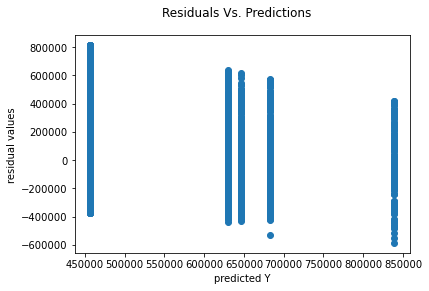

In [92]:
#Checking model for assumptions
linearity_test(y5, x5)

In [93]:
independence_test_DW(y5, x5)

1.959449528695242

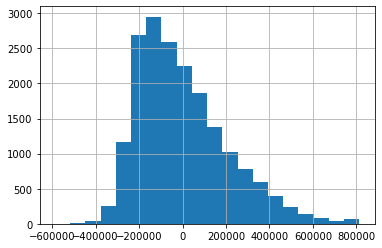

In [94]:
normality_test(y5, x5)

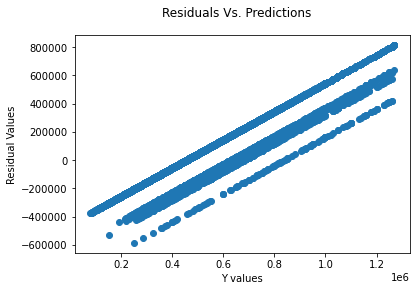

In [95]:
homoskedasticity_test(y5, x5)

Model6:OLS(grade)

In [96]:
df_grade = pd.get_dummies(df['grade'])
df_grade_new = pd.concat([df['price'], df_grade], axis=1)
df_grade_new = df_grade_new.drop(['7 Average'], axis=1)
y6 = df_grade_new['price']
x6 = sm.add_constant(df_grade_new.drop('price', axis=1))

model = sm.OLS(y6,x6)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1590.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:42:23   Log-Likelihood:            -2.4946e+05
No. Observations:               18569   AIC:                         4.989e+05
Df Residuals:                   18560   BIC:                         4.990e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.931e+05   1815.492    216.545      0.000     3.9e+05    3.97e+05
10 Very Good   4.344e+05   6607.293     65.748      0.000    4.21e+05    4.47e+05
11 Excellent     5.5e+05   1.77e+04     31.049      0.000    5.15e+05    5.85e+05
3 Poor        -1.311e+05   1.65e+05     -0.793      0.428   -4.55e+05    1.93e+05
4 Low         -1.685e+05   3.45e+04     -4.883      0.000   -2.36e+05   -1.01e+05
5 Fair        -1.489e+05   1.17e+04    -12.709      0.000   -1.72e+05   -1.26e+05
6 Low Average -1.001e+05   4295.429    -23.315      0.000   -1.09e+05   -9.17e+04
8 Good         1.321e+05   2902.477     45.502      0.000    1.26e+05    1.38e+05
9 Better       3.007e+05   3996.915     75.239      0.000    2.93e+05    3.09e+05
==============================================================================
Omnibus:                     2243.973   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3591.789
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                       4.311   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

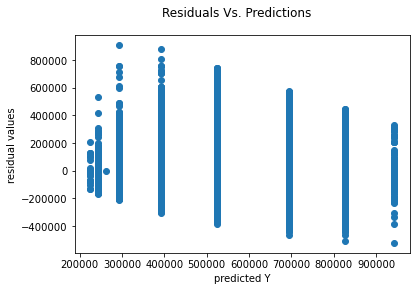

In [97]:
#Checking model for assumptions
linearity_test(y6, x6)

In [98]:
independence_test_DW(y6, x6)

1.9677461868840591

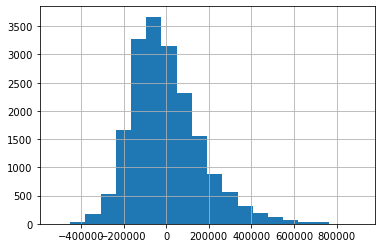

In [99]:
normality_test(y6, x6)

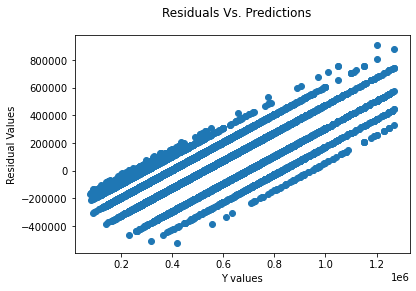

In [100]:
homoskedasticity_test(y6, x6)

In [101]:
df_con = pd.get_dummies(df['condition'])
df_con_new = pd.concat([df['price'], df_con], axis=1)
df_con_new

,price,Average,Fair,Good,Poor,Very Good
0,221900.0,1,0,0,0,0
1,538000.0,1,0,0,0,0
2,180000.0,1,0,0,0,0
3,604000.0,0,0,0,0,1
4,510000.0,1,0,0,0,0
...,...,...,...,...,...,...
21591,475000.0,1,0,0,0,0
21593,400000.0,1,0,0,0,0
21594,402101.0,1,0,0,0,0
21595,400000.0,1,0,0,0,0


Model7:OLS(condition)

In [102]:
df_con = pd.get_dummies(df['condition'])
df_con_new = pd.concat([df['price'], df_con], axis=1)
df_con_new = df_con_new.drop(['Average'], axis=1)

y7 = df_con_new['price']
x7 = sm.add_constant(df_con_new.drop('price', axis=1))

model = sm.OLS(y7,x7)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     41.84
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           5.51e-35
Time:                        09:42:24   Log-Likelihood:            -2.5422e+05
No. Observations:               18569   AIC:                         5.085e+05
Df Residuals:                   18564   BIC:                         5.085e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.738e+05   1950.708    242.910      0.000     4.7e+05    4.78e+05
Fair       -1.723e+05   1.77e+04     -9.721      0.000   -2.07e+05   -1.38e+05
Good       -8847.1716   3585.245     -2.468      0.014   -1.59e+04   -1819.762
Poor       -1.765e+05   4.46e+04     -3.959      0.000   -2.64e+05   -8.91e+04
Very Good       4e+04   6104.124      6.552      0.000     2.8e+04     5.2e+04
==============================================================================
Omnibus:                     2294.523   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3264.311
Skew:                           0.959   Prob(JB):                         0.00
Kurtosis:                       3.734   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

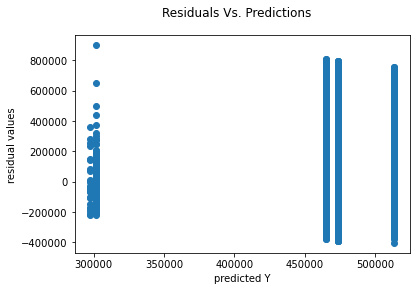

In [103]:
#Checking model for assumptions
linearity_test(y7, x7)

In [104]:
independence_test_DW(y7, x7)

1.9730772236445167

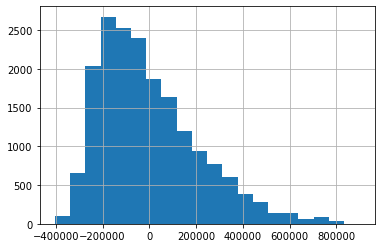

In [105]:
normality_test(y7, x7)

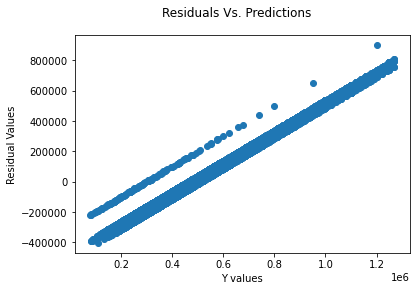

In [106]:
homoskedasticity_test(y7, x7)

In [ ]:
#testing model
y = new_set['price']

x = sm.add_constant(new_set.drop('price', axis=1))

model = sm.OLS(y,x)
model.fit().summary()

In [152]:
df['floors'].std()

0.4784545361843771

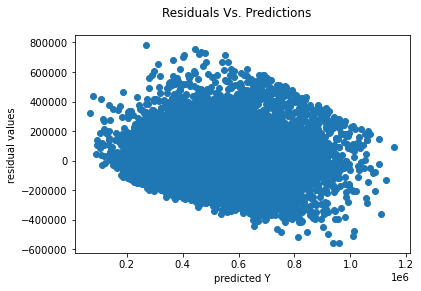

In [108]:
linearity_test(y,x)

In [109]:
independence_test_DW(y,x)

1.9742016139680256

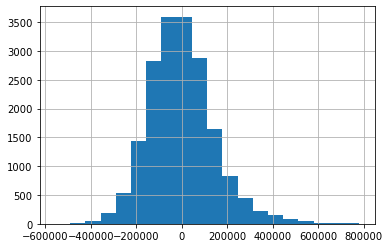

In [110]:
normality_test(y,x)

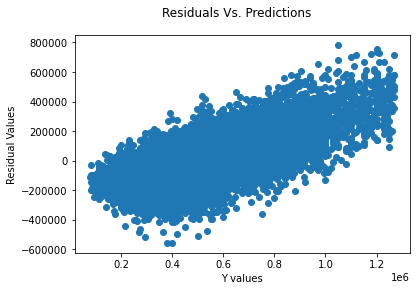

In [111]:
homoskedasticity_test(y,x)

In [112]:
new_set.corr()

,price,bedrooms,age,sqft_living,floors,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Fair,...,condition_Poor,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
price,1.000000,0.287507,-0.115485,0.620168,0.277517,0.146560,0.153063,0.096899,0.129426,-0.071308,...,-0.028802,0.053865,0.321633,0.151275,-0.007210,-0.040737,-0.112271,-0.274835,0.154938,0.373335
bedrooms,0.287507,1.000000,-0.210913,0.596001,0.225844,0.024577,0.000084,0.010124,0.024823,-0.054001,...,-0.043671,0.022370,0.095471,0.041185,-0.020983,-0.075983,-0.129471,-0.253070,0.126219,0.183967
age,-0.115485,-0.210913,1.000000,-0.403044,-0.563863,0.051524,0.028622,0.045305,0.011438,0.068124,...,0.048720,0.234759,-0.147256,-0.052412,0.015679,0.042343,0.133402,0.323521,-0.229480,-0.270629
sqft_living,0.620168,0.596001,-0.403044,1.000000,0.432462,0.100325,0.065408,0.055754,0.103106,-0.071095,...,-0.042156,-0.035672,0.328334,0.141537,-0.014788,-0.062470,-0.146935,-0.357292,0.209917,0.409942
floors,0.277517,0.225844,-0.563863,0.432462,1.000000,-0.010597,-0.001292,-0.027493,-0.008087,-0.054101,...,-0.026542,-0.134103,0.181498,0.067243,-0.006531,-0.028142,-0.078685,-0.224575,0.195155,0.301129
view_AVERAGE,0.146560,0.024577,0.051524,0.100325,-0.010597,1.000000,-0.017990,-0.024103,-0.026534,-0.011629,...,-0.007068,0.019458,0.026489,0.010537,-0.001473,0.000868,-0.010441,-0.032820,0.052268,0.052777
view_EXCELLENT,0.153063,0.000084,0.028622,0.065408,-0.001292,-0.017990,1.000000,-0.010764,-0.011851,-0.008007,...,0.031282,0.009584,0.024571,0.020270,-0.000658,-0.003157,0.007984,-0.013030,0.008749,0.052613
view_FAIR,0.096899,0.010124,0.045305,0.055754,-0.027493,-0.024103,-0.010764,1.000000,-0.015877,-0.005595,...,0.008704,0.009778,0.013045,0.018208,-0.000881,0.021638,-0.003929,-0.017873,0.021371,0.018977
view_GOOD,0.129426,0.024823,0.011438,0.103106,-0.008087,-0.026534,-0.011851,-0.015877,1.000000,-0.002457,...,-0.004656,-0.002276,0.027353,0.039155,-0.000970,-0.004656,-0.009958,-0.026559,0.028834,0.056908
condition_Fair,-0.071308,-0.054001,0.068124,-0.071095,-0.054101,-0.011629,-0.008007,-0.005595,-0.002457,1.000000,...,-0.003146,-0.025152,-0.014134,-0.006164,-0.000656,0.048686,0.054713,0.071271,-0.039200,-0.030470


<AxesSubplot:>

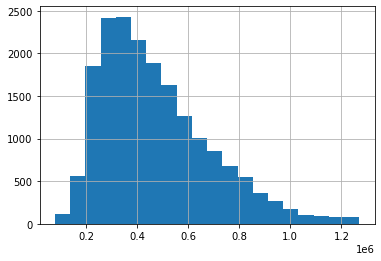

In [113]:
#checking the distribution of y, to see if logging it will fix our broken assumptions
y.hist(bins=20)

In [114]:
#our distribution of prices is right tailed, logging the y value will help make this more normal
y_log = np.log(y)

<AxesSubplot:>

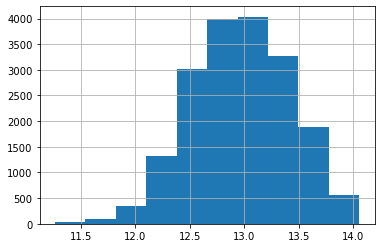

In [115]:
y_log.hist()

In [116]:
#building a model with our new log of y
# it is IMPORTANT to remember, when presenting that we used the log of y

model_logy = sm.OLS(y_log,x)
model_logy.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1040.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:42:26   Log-Likelihood:                -4593.6
No. Observations:               18569   AIC:                             9229.
Df Residuals:                   18548   BIC:                             9394.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.8447      0.004   3024.584      0.000      12.836      12.853
bedrooms               -0.0301      0.003    -10.266      0.000      -0.036      -0.024
age                     0.1197      0.003     38.254      0.000       0.114       0.126
sqft_living             0.1753      0.004     44.333      0.000       0.168       0.183
floors                  0.0335      0.003     11.363      0.000       0.028       0.039
view_AVERAGE            0.1170      0.012      9.746      0.000       0.093       0.140
view_EXCELLENT          0.3302      0.026     12.797      0.000       0.280       0.381
view_FAIR               0.1672      0.019      8.634      0.000       0.129       0.205
view_GOOD               0.1368      0.018      7.716      0.000       0.102       0.172
condition_Fair         -0.1966      0.026     -7.570      0.000      -0.248      -0.146
condition_Good          0.0115      0.006      2.034      0.042       0.000       0.023
condition_Poor         -0.1201      0.065     -1.834      0.067      -0.248       0.008
condition_Very Good     0.1018      0.009     10.846      0.000       0.083       0.120
grade_10 Very Good      0.5087      0.015     34.757      0.000       0.480       0.537
grade_11 Excellent      0.5710      0.034     16.578      0.000       0.504       0.639
grade_3 Poor           -0.4291      0.310     -1.383      0.167      -1.037       0.179
grade_4 Low            -0.4765      0.065     -7.314      0.000      -0.604      -0.349
grade_5 Fair           -0.4615      0.023    -20.430      0.000      -0.506      -0.417
grade_6 Low Average    -0.2715      0.009    -31.571      0.000      -0.288      -0.255
grade_8 Good            0.2241      0.006     36.055      0.000       0.212       0.236
grade_9 Better          0.4099      0.010     42.954      0.000       0.391       0.429
==============================================================================
Omnibus:                       36.296   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.770
Skew:                          -0.100   Prob(JB):                     1.04e-08
Kurtosis:                       3.087   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
np.exp(.1753)

1.1916036440887825

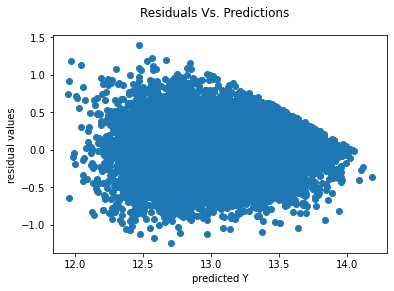

In [117]:
linearity_test(y_log,x)

In [118]:
independence_test_DW(y_log,x)

1.973827510416785

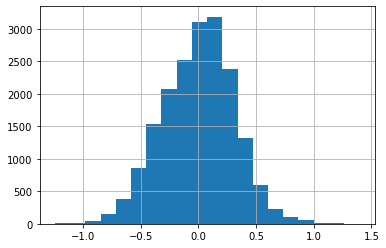

In [119]:
normality_test(y_log,x)

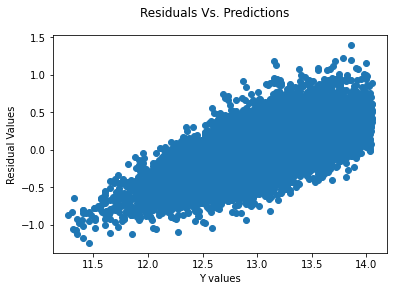

In [120]:
homoskedasticity_test(y_log,x)

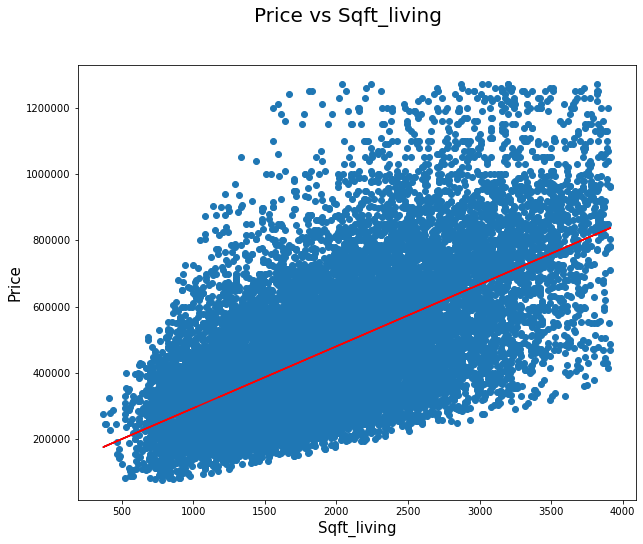

In [121]:
    y = df['price']
    x = df['sqft_living']
    fig, ax = plt.subplots(figsize = (10,8))
    ax.scatter(x, y)
    ax.set_ylabel('Price', size = 15)
    ax.set_xlabel('Sqft_living', size = 15)
    plt.suptitle('Price vs Sqft_living', size = 20)
    
    ax.ticklabel_format(useOffset=False)
    ax.ticklabel_format(useOffset=False, style='plain')

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b)
    plt.plot(x, m*x+b, color='red')


In [122]:
Grade_list = ['7 Average', '8 Good', '6 Low Average','10 Very Good','11 Excellent','4 Low' ]

In [123]:
df['grade'].value_counts()

7 Average        8290
8 Good           5328
9 Better         2155
6 Low Average    1803
10 Very Good      677
5 Fair            204
11 Excellent       88
4 Low              23
3 Poor              1
Name: grade, dtype: int64

In [124]:
df_grade_price = pd.concat([df['price'], df['grade']], axis=1)

In [125]:
df_grade_price

,price,grade
0,221900.0,7 Average
1,538000.0,7 Average
2,180000.0,6 Low Average
3,604000.0,7 Average
4,510000.0,8 Good
...,...,...
21591,475000.0,8 Good
21593,400000.0,8 Good
21594,402101.0,7 Average
21595,400000.0,8 Good


In [126]:
group = df_grade_price.groupby('grade')['price'].mean().sort_values(ascending=True)

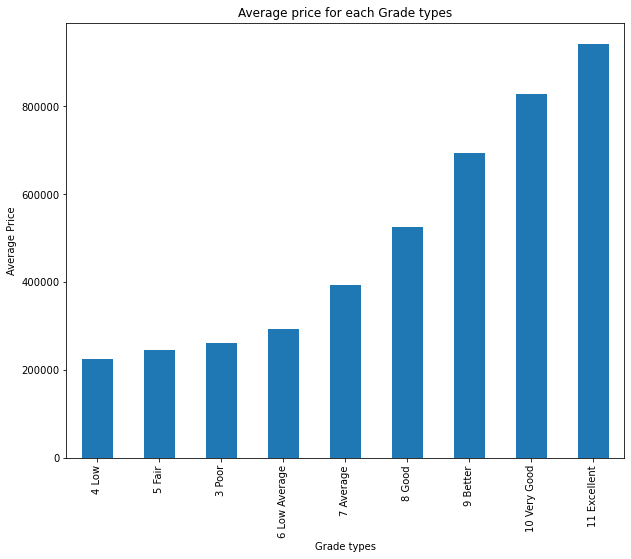

In [127]:
group.plot(kind = 'bar', title = 'Average price for each Grade types', figsize=(10,8))


plt.xlabel("Grade types")
plt.ylabel("Average Price");

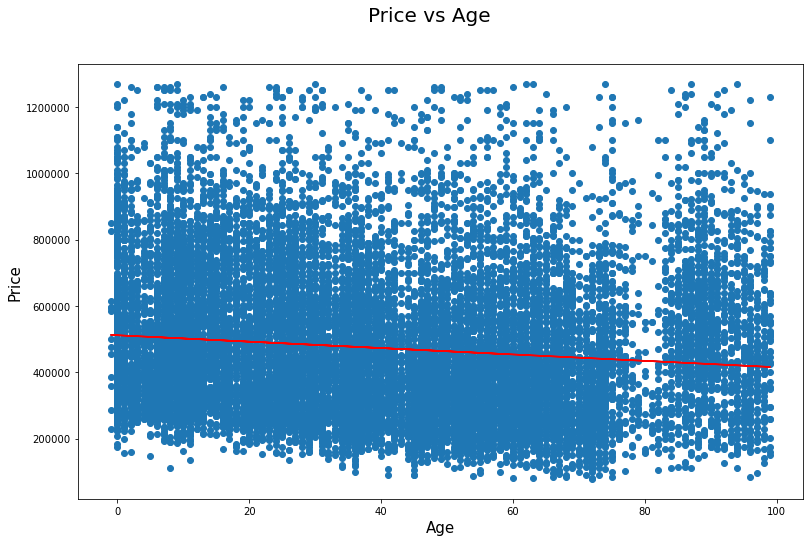

In [128]:
    y = df['price']
    x = df['age']
    fig, ax = plt.subplots(figsize = (13,8))
    ax.scatter(x, y)
    ax.set_ylabel('Price', size = 15)
    ax.set_xlabel('Age', size = 15)
    plt.suptitle('Price vs Age', size = 20)
    
    ax.ticklabel_format(useOffset=False)
    ax.ticklabel_format(useOffset=False, style='plain')

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b)
    plt.plot(x, m*x+b, color='red')


In [129]:
df_age_price = pd.concat([df['price'], df['age']], axis=1)
df_age_price

,price,age
0,221900.0,59
1,538000.0,23
2,180000.0,82
3,604000.0,49
4,510000.0,28
...,...,...
21591,475000.0,7
21593,400000.0,1
21594,402101.0,5
21595,400000.0,11


In [130]:
df_age_price['age'].value_counts()

 9     392
 11    388
 10    382
 0     380
 37    372
      ... 
 78     31
 79     28
 81     16
 80     15
-1      13
Name: age, Length: 101, dtype: int64

In [131]:
#testing model with bedrooms, age, floor, sqft_living,
y22 = new_df['price']

x22 = sm.add_constant(new_df.drop('price', axis=1))

model22 = sm.OLS(y22,x22)
model22.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     3438.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:42:28   Log-Likelihood:            -2.4916e+05
No. Observations:               18569   AIC:                         4.983e+05
Df Residuals:                   18564   BIC:                         4.984e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.728e+05   1193.507    396.143      0.000     4.7e+05    4.75e+05
bedrooms    -2.826e+04   1488.133    -18.993      0.000   -3.12e+04   -2.53e+04
age          4.641e+04   1479.702     31.361      0.000    4.35e+04    4.93e+04
sqft_living  1.584e+05   1636.958     96.768      0.000    1.55e+05    1.62e+05
floors       2.359e+04   1502.169     15.702      0.000    2.06e+04    2.65e+04
==============================================================================
Omnibus:                     1572.880   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2310.494
Skew:                           0.675   Prob(JB):                         0.00
Kurtosis:                       4.078   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

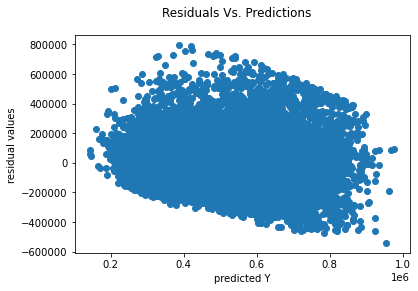

In [132]:
linearity_test(y22,x22)

In [133]:
independence_test_DW(y22,x22)

1.975114430809398

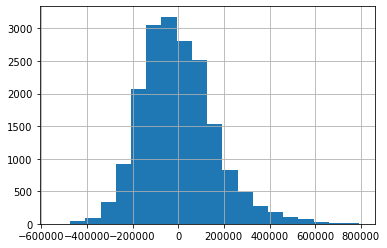

In [134]:
normality_test(y22,x22)

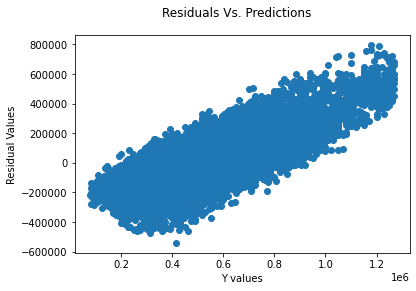

In [135]:
homoskedasticity_test(y22,x22)

In [143]:
#this model is used to check different situation
y33 = new_set['price']

x33 = sm.add_constant(new_set.drop(['price','sqft_living','age','grade_3 Poor','condition_Fair'], axis=1))

model33 = sm.OLS(y33,x33)
model33.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1013.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:42:30   Log-Likelihood:            -2.4848e+05
No. Observations:               18569   AIC:                         4.970e+05
Df Residuals:                   18552   BIC:                         4.971e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.683e+05   2012.738    182.999      0.000    3.64e+05    3.72e+05
bedrooms              1.79e+04   1248.540     14.340      0.000    1.55e+04    2.04e+04
floors               1770.4773   1382.059      1.281      0.200    -938.485    4479.440
view_AVERAGE         1.053e+05   6018.278     17.493      0.000    9.35e+04    1.17e+05
view_EXCELLENT       2.777e+05    1.3e+04     21.347      0.000    2.52e+05    3.03e+05
view_FAIR            1.353e+05   9758.907     13.869      0.000    1.16e+05    1.54e+05
view_GOOD            1.297e+05   8924.333     14.533      0.000    1.12e+05    1.47e+05
condition_Good       3.857e+04   2750.674     14.020      0.000    3.32e+04     4.4e+04
condition_Poor       1.154e+04   3.31e+04      0.349      0.727   -5.33e+04    7.64e+04
condition_Very Good  1.032e+05   4584.551     22.503      0.000    9.42e+04    1.12e+05
grade_10 Very Good   4.226e+05   6555.379     64.462      0.000     4.1e+05    4.35e+05
grade_11 Excellent   5.239e+05    1.7e+04     30.895      0.000    4.91e+05    5.57e+05
grade_4 Low         -1.323e+05   3.29e+04     -4.022      0.000   -1.97e+05   -6.78e+04
grade_5 Fair        -1.357e+05   1.13e+04    -12.004      0.000   -1.58e+05   -1.14e+05
grade_6 Low Average -9.087e+04   4184.702    -21.715      0.000   -9.91e+04   -8.27e+04
grade_8 Good         1.236e+05   2920.993     42.313      0.000    1.18e+05    1.29e+05
grade_9 Better       2.851e+05   4197.818     67.920      0.000    2.77e+05    2.93e+05
==============================================================================
Omnibus:                     1764.145   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2692.622
Skew:                           0.722   Prob(JB):                         0.00
Kurtosis:                       4.181   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

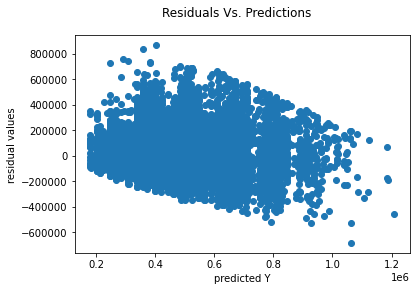

In [137]:
linearity_test(y33,x33)

In [138]:
independence_test_DW(y33,x33)

1.9701366679542816

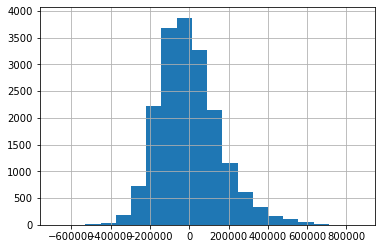

In [139]:
normality_test(y33,x33)

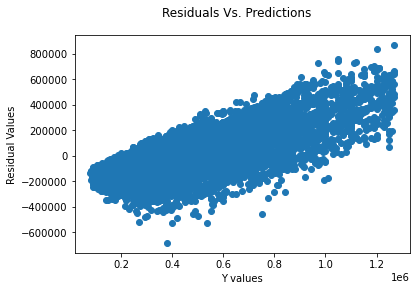

In [140]:
homoskedasticity_test(y33,x33)

In [141]:
df1 = df.copy()

In [142]:
df1.loc[(df['sqft_living']>1965) & (df['sqft_living'] < 1985)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
53,3626039271,2/5/2015,585000.0,2,1.75,1980,8550,1.0,NO,NONE,...,990.0,1981,0,98117,47.6989,-122.369,1480,6738,2015,34
90,2791500270,5/22/2014,243500.0,4,2.50,1980,7403,2.0,NO,NONE,...,0.0,1988,0,98023,47.2897,-122.372,1980,7510,2014,26
101,5200100125,10/27/2014,555000.0,3,2.00,1980,3478,1.5,NO,NONE,...,540.0,1929,0,98117,47.6775,-122.372,1610,3478,2014,85
176,3881900445,7/9/2014,399950.0,5,2.75,1970,5400,1.0,NO,NONE,...,650.0,1986,0,98144,47.5868,-122.308,1280,2150,2014,28
196,7549802535,11/11/2014,423000.0,4,2.00,1970,6480,1.5,NO,NONE,...,840.0,1920,0,98108,47.5511,-122.312,1500,6480,2014,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20860,8669180150,3/26/2015,300000.0,4,3.00,1984,4419,2.0,NO,NONE,...,0.0,2010,0,98002,47.3514,-122.213,2440,4418,2015,5
21116,3814900950,7/25/2014,345000.0,4,2.50,1983,6002,2.0,NO,NONE,...,0.0,2012,0,98092,47.3281,-122.164,2502,4750,2014,2
21384,9478500180,8/28/2014,317750.0,3,2.50,1980,4500,2.0,NO,NONE,...,0.0,2012,0,98042,47.3682,-122.117,1980,4500,2014,2
21421,7853361120,7/29/2014,530000.0,3,2.50,1970,6295,2.0,NO,NONE,...,0.0,2011,0,98065,47.5158,-121.874,2710,6009,2014,3
